In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("epil", "MASS").data

# md = smf.gee("y ~ age + trt + base", "subject", data,
#              cov_struct=sm.cov_struct.Independence(),
#              family=sm.families.Poisson())
# mdf = md.fit()
# print mdf.summary()

In [3]:
path = "data/MoniteringResults/0"

import pickle
def load(path):
    with open(path,"rb") as f:
        return pickle.load(f)

In [4]:
trends = load(path)["trends"]

In [54]:
trends[3].shape

(86400,)

In [17]:
import pandas as pd
trends_0=pd.DataFrame(trends[0])
time_idx = date_range('1/1/2011', periods=86400, freq='S')
trends_0['time'] = time_idx
print len(trends_0)
trends_0.index = pd.DatetimeIndex(trends_0['time']) 

86400


In [55]:
import csv

for k in xrange(4):
    with open('data'+str(k)+'.csv', 'w') as csvfile:
        fieldnames = ['Index', 'Speed']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in xrange(86400):
            writer.writerow({'Index': i, 'Speed': trends[k][i]})
      

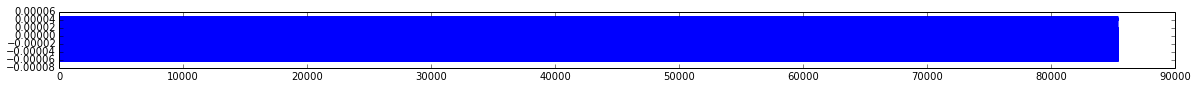

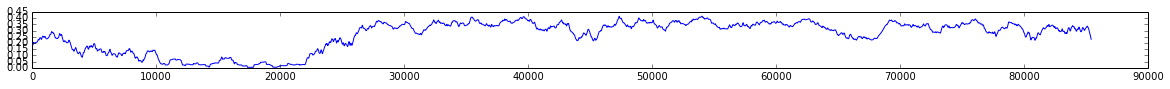

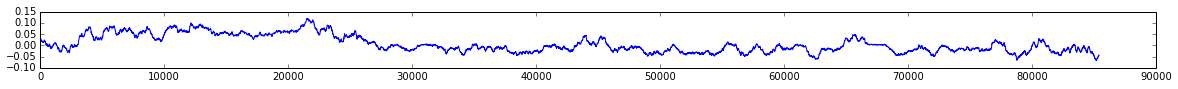

In [45]:
%matplotlib inline
result =[]

with open('decomposed.csv','r') as csvfile:
    next(csvfile)
    for line in csvfile:
        result.append(line.strip().split(',')[1:])
result = np.array(result).astype('float32')


from matplotlib import pyplot as plt

for i in range(3):
    plt.figure(figsize=(20,1))
    plt.plot([(np.mean(result[j:j+1000,i])) for j in range(len(result)-999)])
    plt.show()

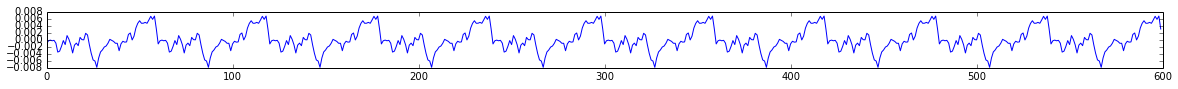

In [44]:
plt.figure(figsize=(20,1))
plt.plot(result[:600,0])

In [16]:
from pandas import date_range
date_range('1/1/2011', periods=86400, freq='S')

<class 'pandas.tseries.index.DatetimeIndex'>
[2011-01-01 00:00:00, ..., 2011-01-01 23:59:59]
Length: 86400, Freq: S, Timezone: None

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(trends_0[0],freq=24)  
fig = res.plot()
fig.show()  

ValueError: freq S not understood. Please report if you think this in error.

In [2]:
sm.version.version

'0.6.1'

In [1]:
for i in xrange(3):
    !ls

apply_to_all.ipynb  data3.csv	       Inferring.ipynb	  Rplots.pdf
data		    data.csv	       plotJoinResult.py  SpatialJoin
data0.csv	    decomposed.csv     plot.py		  TimeSeries.ipynb
data1.csv	    Exploring_2.ipynb  README.md	  ts.r
data2.csv	    Exploring.ipynb    results		  WhatHappened.py
apply_to_all.ipynb  data3.csv	       Inferring.ipynb	  Rplots.pdf
data		    data.csv	       plotJoinResult.py  SpatialJoin
data0.csv	    decomposed.csv     plot.py		  TimeSeries.ipynb
data1.csv	    Exploring_2.ipynb  README.md	  ts.r
data2.csv	    Exploring.ipynb    results		  WhatHappened.py
apply_to_all.ipynb  data3.csv	       Inferring.ipynb	  Rplots.pdf
data		    data.csv	       plotJoinResult.py  SpatialJoin
data0.csv	    decomposed.csv     plot.py		  TimeSeries.ipynb
data1.csv	    Exploring_2.ipynb  README.md	  ts.r
data2.csv	    Exploring.ipynb    results		  WhatHappened.py
